# Warehouse Facility 03 - Warehouse Inventory assessment
*This notebook illustrates how to assess the inventory position of a storage system.
***
Alessandro Tufano, Ph.D. 2021

### Import packages

In [1]:
# %% append functions path
import sys; sys.path.insert(0, '..') #add the above level with the package

import os

import pandas as pd
import numpy as np

from IPython.display import display, HTML #display dataframe

### Set data fields

In [2]:
string_casestudy = 'TOY_DATA'

### Import data

In [3]:
# %% import data
from analogistics.data.data_generator_warehouse import generateWarehouseData
D_locations, D_SKUs, D_movements, D_inventory = generateWarehouseData()


In [4]:
#print locations dataframe
display(HTML(D_locations.head().to_html()))

,NODECODE,IDWH,WHSUBAREA,IDLOCATION,LOCCODEX,LOCCODEY,LOCCODEZ,RACK,BAY,LEVEL
0,1,FAKE,AREA 1,1,0,0,0,0,0,0
0,1,FAKE,AREA 1,2,0,0,1200,0,0,1
0,1,LOGICAL_WH2,AREA 1,3,0,0,2400,0,0,2
0,1,LOGICAL_WH2,AREA 1,4,0,0,3600,0,0,3
0,1,FAKE,AREA 1,5,0,0,4800,0,0,4


In [5]:
#print SKUs master file dataframe
display(HTML(D_SKUs.head().to_html()))

,ITEMCODE,DESCRIPTION,VOLUME,WEIGHT
0,0,PRODOTTO_0,50.148246,5.950880
0,1,PRODOTTO_1,44.014525,6.428954
0,2,PRODOTTO_2,3.138946,7.566378
0,3,PRODOTTO_3,86.841863,3.123917
0,4,PRODOTTO_4,22.600241,7.253223


In [6]:
#print SKUs master file dataframe
display(HTML(D_movements.head().to_html()))

,ITEMCODE,NODECODE,IDWH,WHSUBAREA,IDLOCATION,RACK,BAY,LEVEL,LOCCODEX,LOCCODEY,LOCCODEZ,ORDERCODE,PICKINGLIST,QUANTITY,VOLUME,WEIGHT,TIMESTAMP_IN,INOUT,ORDERTYPE
0,17,1,FAKE,AREA 1,413,1,16,2,4000,12800,2400,300,300,4.282815,224.328881,20.029568,2020-01-02 01:21:53.839518,,PUTAWAY
0,94,1,FAKE,AREA 1,21,0,4,0,0,3200,0,196,196,9.367121,873.945882,54.883861,2020-01-02 02:12:54.655136,-,PICKING
0,16,1,LOGICAL_WH2,AREA 1,109,0,21,3,0,16800,3600,721,721,6.965105,531.089458,50.547234,2020-01-02 02:19:11.084377,+,OTHER
0,60,1,FAKE,AREA 1,1650,4,65,4,16000,52000,4800,596,596,18.433100,1833.065672,152.141705,2020-01-02 02:40:32.062249,+,OTHER
0,95,1,FAKE,AREA 1,1005,3,2,4,12000,1600,4800,507,507,3.407946,44.384700,3.144701,2020-01-02 03:51:09.172963,-,PUTAWAY


In [7]:
#print SKUs master file dataframe
display(HTML(D_inventory.head().to_html()))

,NODECODE,IDWH,ITEMCODE,IDLOCATION,QUANTITY,TIMESTAMP
0,1,LOGICAL_WH2,0,1118,7.221159,2020-01-02
0,1,FAKE,1,710,5.126170,2020-01-02
0,1,LOGICAL_WH2,2,865,19.548946,2020-01-02
0,1,LOGICAL_WH1,3,1056,15.927466,2020-01-02
0,1,FAKE,4,1095,18.617105,2020-01-02


### Create folder hierarchy

In [8]:
# %% create folder hierarchy
pathResults = 'C:\\Users\\aletu\\desktop'
root_path = os.path.join(pathResults,f"{string_casestudy}_results")
path_results = os.path.join(root_path,f"P8_warehouseAssessment")

os.makedirs(root_path, exist_ok=True)
os.makedirs(path_results, exist_ok=True)

### Set the columns name

In [9]:
# %% SET COLUMNS MOVEMENTS
timecolumn_mov='TIMESTAMP_IN'
itemcodeColumns_mov='ITEMCODE'
inout_column_mov = 'INOUT'
x_col_mov = 'LOCCODEX'
y_col_mov = 'LOCCODEY'
z_col_mov = 'LOCCODEZ'

In [10]:
# %% SET COLUMNS SKUS
itemcodeColumns_sku='ITEMCODE'

In [11]:
# %% SET COLUMNS INVENTORY
itemcodeColumns_inv = 'ITEMCODE'

### Generate the inventory curve for each SKU

In [13]:
# generate the inventory curve for each SKU
from analogistics.supply_chain.information_framework import updatePartInventory
D_SKUs= updatePartInventory(D_SKUs,D_movements,D_inventory,timecolumn_mov,itemcodeColumns_sku,itemcodeColumns_mov,itemcodeColumns_inv) 


..\analogistics\supply_chain\information_framework.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_movements['MOVEMENT'] = D_movements['INOUT'].astype(str) + D_movements[quantityColums].astype(str)
..\analogistics\supply_chain\information_framework.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_movements['MOVEMENT'] = D_movements['MOVEMENT'].astype(float)
..\analogistics\supply_chain\information_framework.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

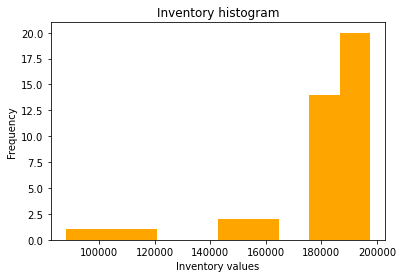

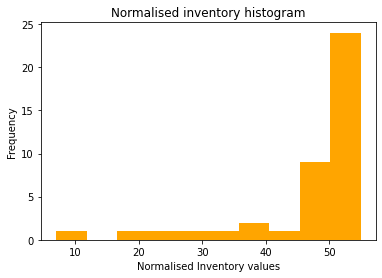

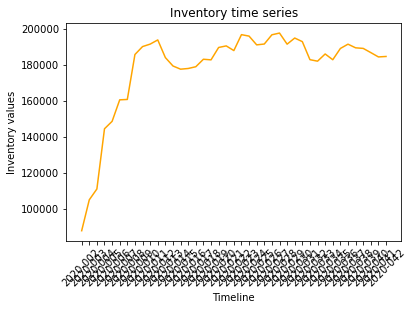

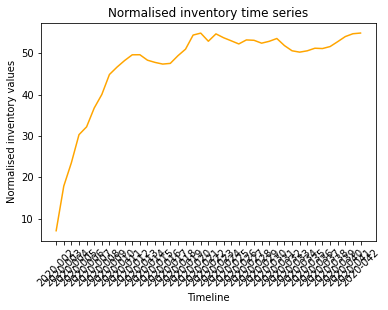

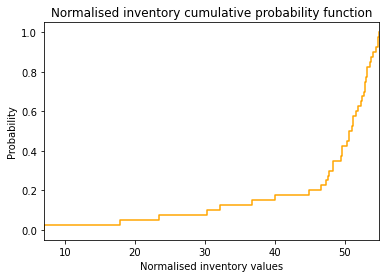

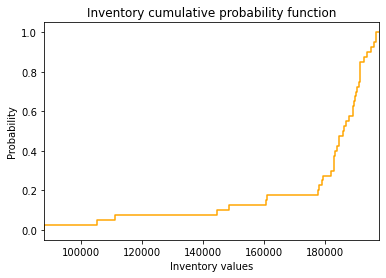

In [14]:
# %% update global inventory
from analogistics.supply_chain.P8_performance_assessment.wh_inventory_assessment import updateGlobalInventory

path_current = os.path.join(path_results,f"Inventory")
os.makedirs(path_current, exist_ok=True)

D_global_inventory = updateGlobalInventory(D_SKUs,inventoryColumn='INVENTORY_QTY')
D_global_inventory.to_excel(path_current+"\\global inventory.xlsx")

        
# %% analyse the inventory behaviour
from analogistics.supply_chain.P8_performance_assessment.wh_inventory_assessment import inventoryAnalysis

output_figures = inventoryAnalysis(D_global_inventory)

for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png") 
        

### INVENTORY design

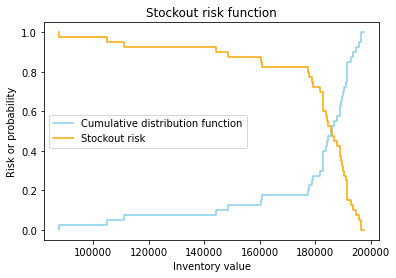

In [15]:
from analogistics.supply_chain.P8_performance_assessment.wh_inventory_assessment import defineStockoutCurve

output_figure = defineStockoutCurve(D_global_inventory['WH_INVENTORY_VOLUME'])
for key in output_figures.keys():
        output_figures[key].savefig(path_current+f"\\{key}.png") 